In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
!pip install plotly
import plotly.offline as py
import plotly.graph_objs as go

In [2]:
#Loading the original dataset
diabetes_df = pd.read_csv(r"Downloads/Diabetes prediction/diabetes.csv")

In [3]:
diabetes_df.head(10)
#the present dataset contains 8 predictor variables and one target variable, 'Outcome'.
# The predictor variables are Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction & Age.
#initial glance at dataset shows that there are some zeros in "BloodPressure","SkinThickness","Insulin", "BMI" which are quite impossible

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [4]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes_df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T
# Glucose, BloodPressure, SkinThickness, Insulin, BMI have invalid zero values
#

count        mean         std     min        5%  \
Pregnancies               768.0    3.845052    3.369578   0.000   0.00000   
Glucose                   768.0  120.894531   31.972618   0.000  79.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  38.70000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  21.80000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.14035   
Age                       768.0   33.240885   11.760232  21.000  21.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               25%       50%        75%       90%        95%  \
Pregnancies                1.00000    3.0000    6.00000    9.0000   10.00000   
Glucose                   99.00000  117.0000  140.25000  167.0000  181.00000   
BloodPressure             62.00000   72.0000   80.00000   88.0000   90.00000   
SkinThickness              0.00000   23.0000   32.00000   40.0000   44.00000   
Insulin                    0.00000   30.5000  127.25000  210.0000  293.00000   
BMI                       27.30000   32.0000   36.60000   41.5000   44.39500   
DiabetesPedigreeFunction   0.24375    0.3725    0.62625    0.8786    1.13285   
Age                       24.00000   29.0000   41.00000   51.0000   58.00000   
Outcome                    0.00000    0.0000    1.00000    1.0000    1.00000   

                                99%     max  
Pregnancies                13.00000   17.00  
Glucose                   196.00000  199.00  
BloodPressure             106.00000  122.00  
SkinThickness              51.33000   99.00  
Insulin                   519.90000  846.00  
BMI                        50.75900   67.10  
DiabetesPedigreeFunction    1.69833    2.42  
Age                        67.00000   81.00  
Outcome                     1.00000    1.00

# Visualization of dataset:

In [6]:
#visualisation of data for better understanding of distribution of 'Outcome' which will show us how many person in the dataset are diabetic (1) or non-diabetic(0)
diabetes_df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

Text(0.5, 1.0, 'Count Plot for Outcome')

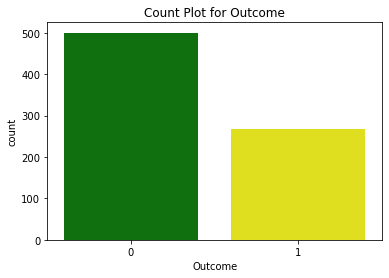

In [7]:
#plotting the distribution of outcome
sns.countplot(x='Outcome', data=diabetes_df, palette = ["green", "yellow"])
plt.title('Count Plot for Outcome')

# it shows class imbalanced because it contains more 'non-diabetic' persons i.e., 500 in comparison to 'diabetic' persons i.e., 268

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Boxplot for Number of pregnancies by Outcome')

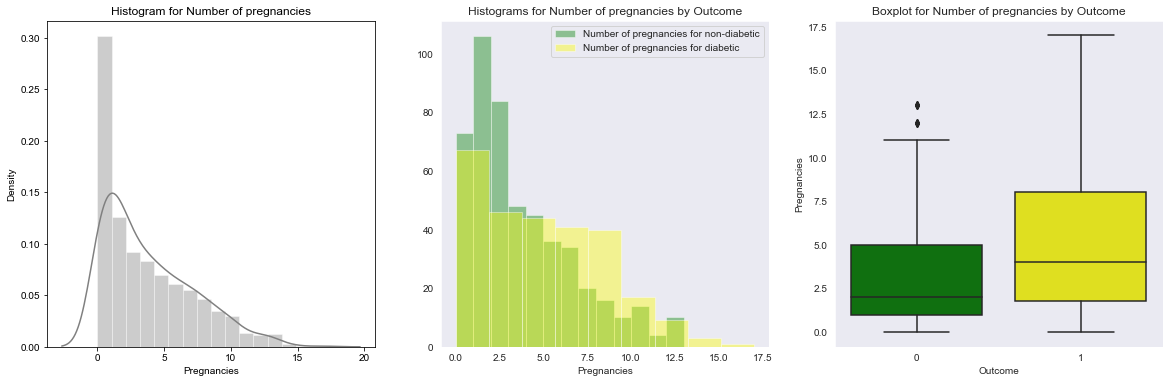

In [8]:
## Creating 3 subplots - 1st for histogram, 2nd for histogram segmented by Outcome and 3rd for representing same segmentation using boxplot
dia0 = diabetes_df[diabetes_df.Outcome==0]
dia1=diabetes_df[diabetes_df.Outcome==1]
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Number of pregnancies")
sns.distplot(diabetes_df.Pregnancies, color = "grey", kde=True)
plt.subplot(1,3,2)
sns.distplot(dia0.Pregnancies,kde=False,color="green", label="Number of pregnancies for non-diabetic")
sns.distplot(dia1.Pregnancies,kde=False,color = "yellow", label = "Number of pregnancies for diabetic")
plt.title("Histograms for Number of pregnancies by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=diabetes_df.Outcome,y=diabetes_df.Pregnancies,palette = ["green", "yellow"])
plt.title("Boxplot for Number of pregnancies by Outcome")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Boxplot for Glucose by Outcome')

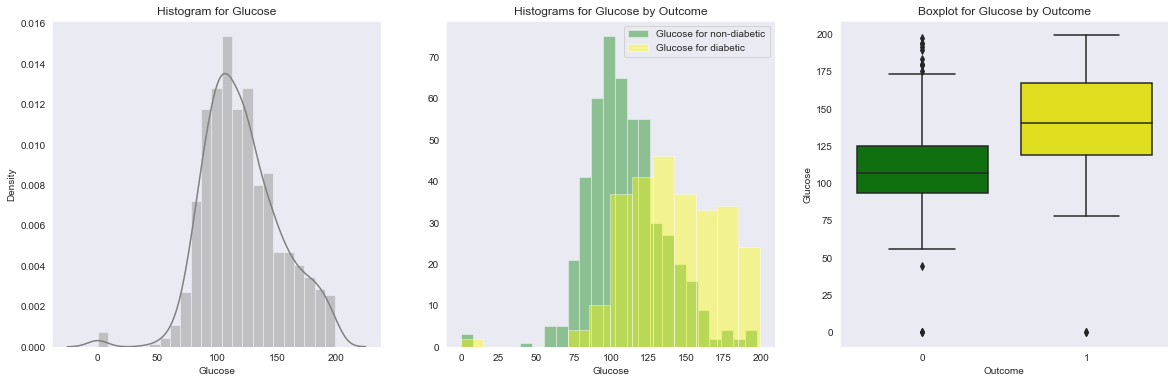

In [9]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Glucose")
sns.distplot(diabetes_df.Glucose,color = "grey", kde=True)
plt.subplot(1,3,2)
sns.distplot(dia0.Glucose,kde=False,color="green", label="Glucose for non-diabetic")
sns.distplot(dia1.Glucose,kde=False,color = "yellow", label = "Glucose for diabetic")
plt.title("Histograms for Glucose by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=diabetes_df.Outcome,y=diabetes_df.Glucose,palette = ["green", "yellow"])
plt.title("Boxplot for Glucose by Outcome")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Boxplot for BloodPressure by Outcome')

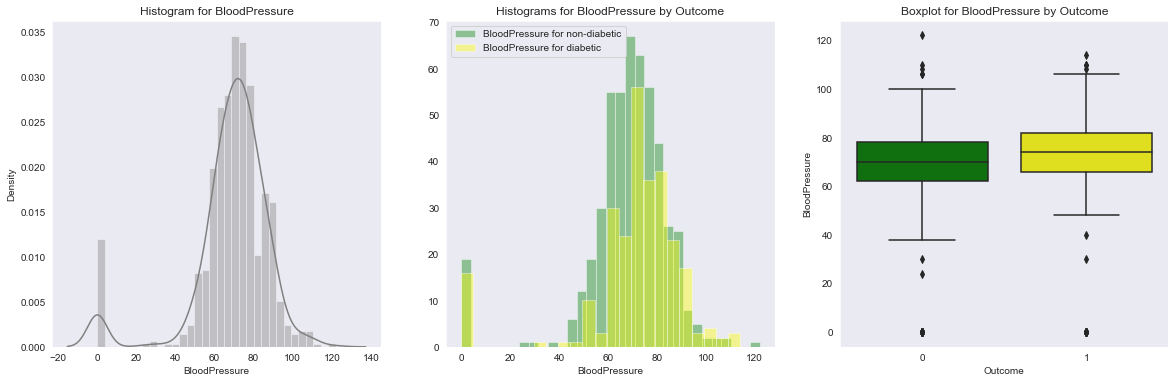

In [10]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for BloodPressure")
sns.distplot(diabetes_df.BloodPressure,color = "grey", kde=True)
plt.subplot(1,3,2)
sns.distplot(dia0.BloodPressure,kde=False,color="green", label="BloodPressure for non-diabetic")
sns.distplot(dia1.BloodPressure,kde=False,color = "yellow", label = "BloodPressure for diabetic")
plt.title("Histograms for BloodPressure by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=diabetes_df.Outcome,y=diabetes_df.BloodPressure,palette = ["green", "yellow"])
plt.title("Boxplot for BloodPressure by Outcome")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Boxplot for SkinThickness by Outcome')

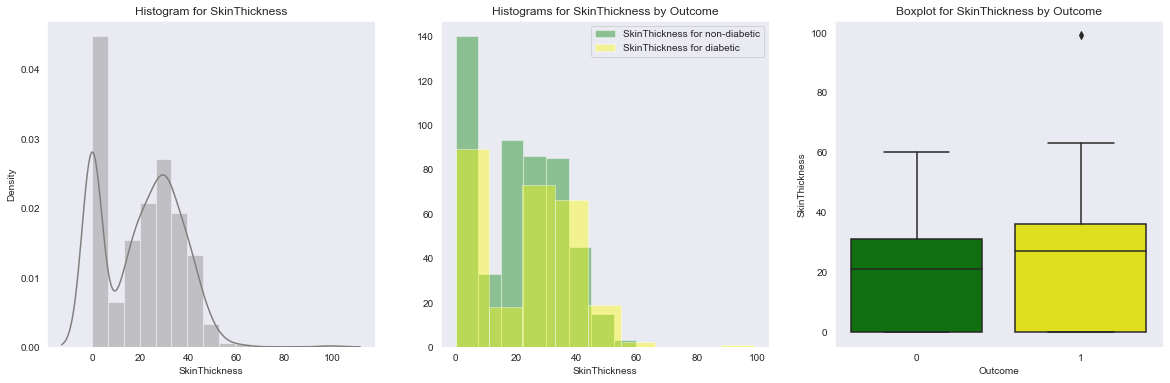

In [11]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for SkinThickness")
sns.distplot(diabetes_df.SkinThickness,color = "grey", kde=True)
plt.subplot(1,3,2)
sns.distplot(dia0.SkinThickness,kde=False,color="green", label="SkinThickness for non-diabetic")
sns.distplot(dia1.SkinThickness,kde=False,color = "yellow", label = "SkinThickness for diabetic")
plt.title("Histograms for SkinThickness by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=diabetes_df.Outcome,y=diabetes_df.SkinThickness,palette = ["green", "yellow"])
plt.title("Boxplot for SkinThickness by Outcome")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Boxplot for Insulin by Outcome')

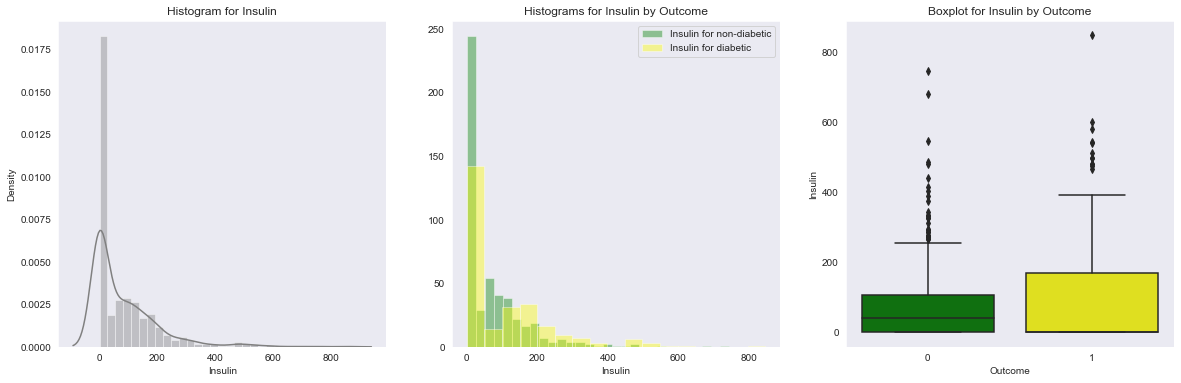

In [12]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Insulin")
sns.distplot(diabetes_df.Insulin,color = "grey", kde=True)
plt.subplot(1,3,2)
sns.distplot(dia0.Insulin,kde=False,color="green", label="Insulin for non-diabetic")
sns.distplot(dia1.Insulin,kde=False,color = "yellow", label = "Insulin for diabetic")
plt.title("Histograms for Insulin by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=diabetes_df.Outcome,y=diabetes_df.Insulin,palette = ["green", "yellow"])
plt.title("Boxplot for Insulin by Outcome")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Boxplot for BMI by Outcome')

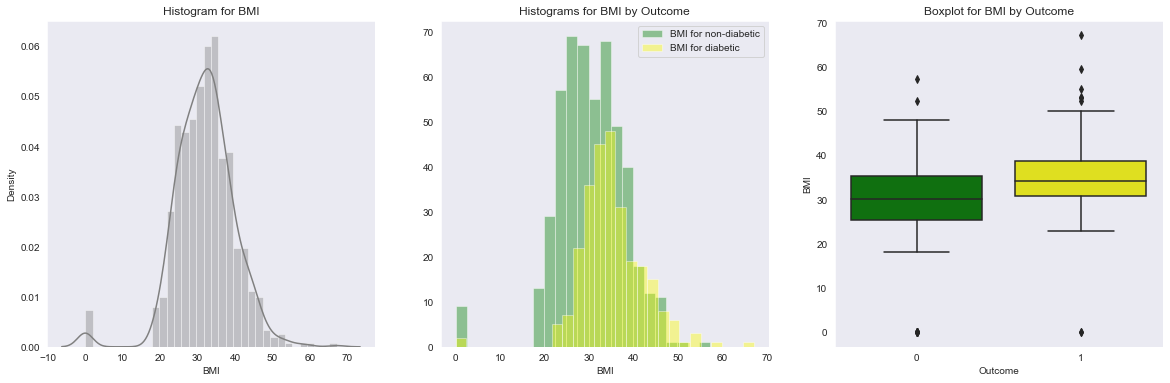

In [13]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for BMI")
sns.distplot(diabetes_df.BMI,color = "grey", kde=True)
plt.subplot(1,3,2)
sns.distplot(dia0.BMI,kde=False,color="green", label="BMI for non-diabetic")
sns.distplot(dia1.BMI,kde=False,color = "yellow", label = "BMI for diabetic")
plt.title("Histograms for BMI by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=diabetes_df.Outcome,y=diabetes_df.BMI,palette = ["green", "yellow"])
plt.title("Boxplot for BMI by Outcome")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Boxplot for DiabetesPedigreeFunction by Outcome')

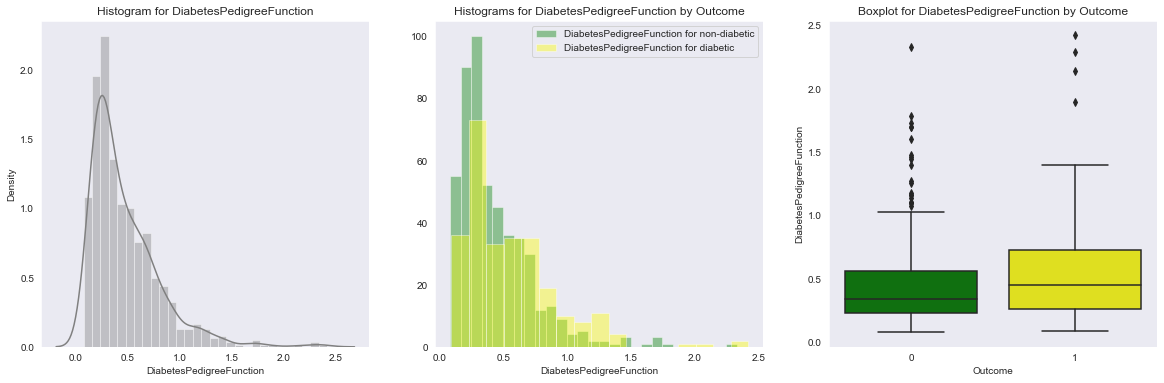

In [14]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for DiabetesPedigreeFunction")
sns.distplot(diabetes_df.DiabetesPedigreeFunction,color = "grey", kde=True)
plt.subplot(1,3,2)
sns.distplot(dia0.DiabetesPedigreeFunction,kde=False,color="green", label="DiabetesPedigreeFunction for non-diabetic")
sns.distplot(dia1.DiabetesPedigreeFunction,kde=False,color = "yellow", label = "DiabetesPedigreeFunction for diabetic")
plt.title("Histograms for DiabetesPedigreeFunction by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=diabetes_df.Outcome,y=diabetes_df.DiabetesPedigreeFunction,palette = ["green", "yellow"])
plt.title("Boxplot for DiabetesPedigreeFunction by Outcome")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Boxplot for Age by Outcome')

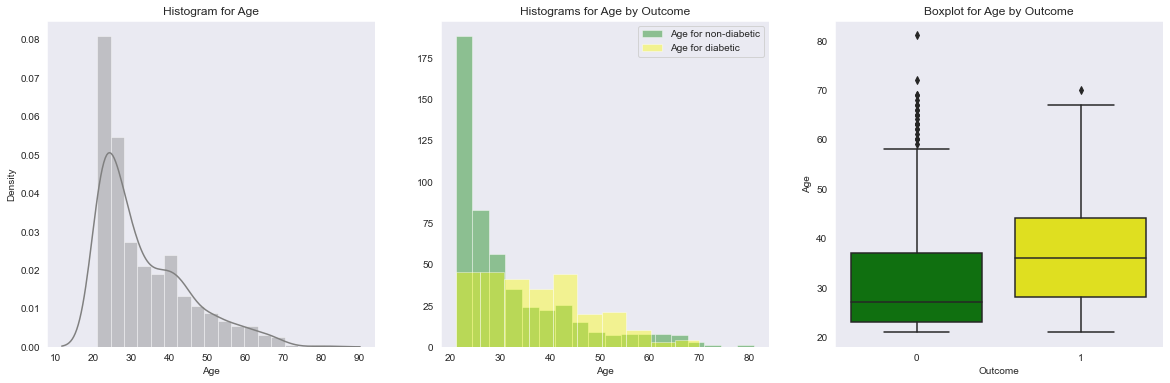

In [15]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Age")
sns.distplot(diabetes_df.Age,color = "grey", kde=True)
plt.subplot(1,3,2)
sns.distplot(dia0.Age,kde=False,color="green", label="Age for non-diabetic")
sns.distplot(dia1.Age,kde=False,color = "yellow", label = "Age for diabetic")
plt.title("Histograms for Age by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=diabetes_df.Outcome,y=diabetes_df.Age,palette = ["green", "yellow"])
plt.title("Boxplot for Age by Outcome")

Screening of Association between Variables to study Bivariate relationship
We will use pairplot to study the association between variables – from individual scatter plots
Then we will summarize the same as heatmap

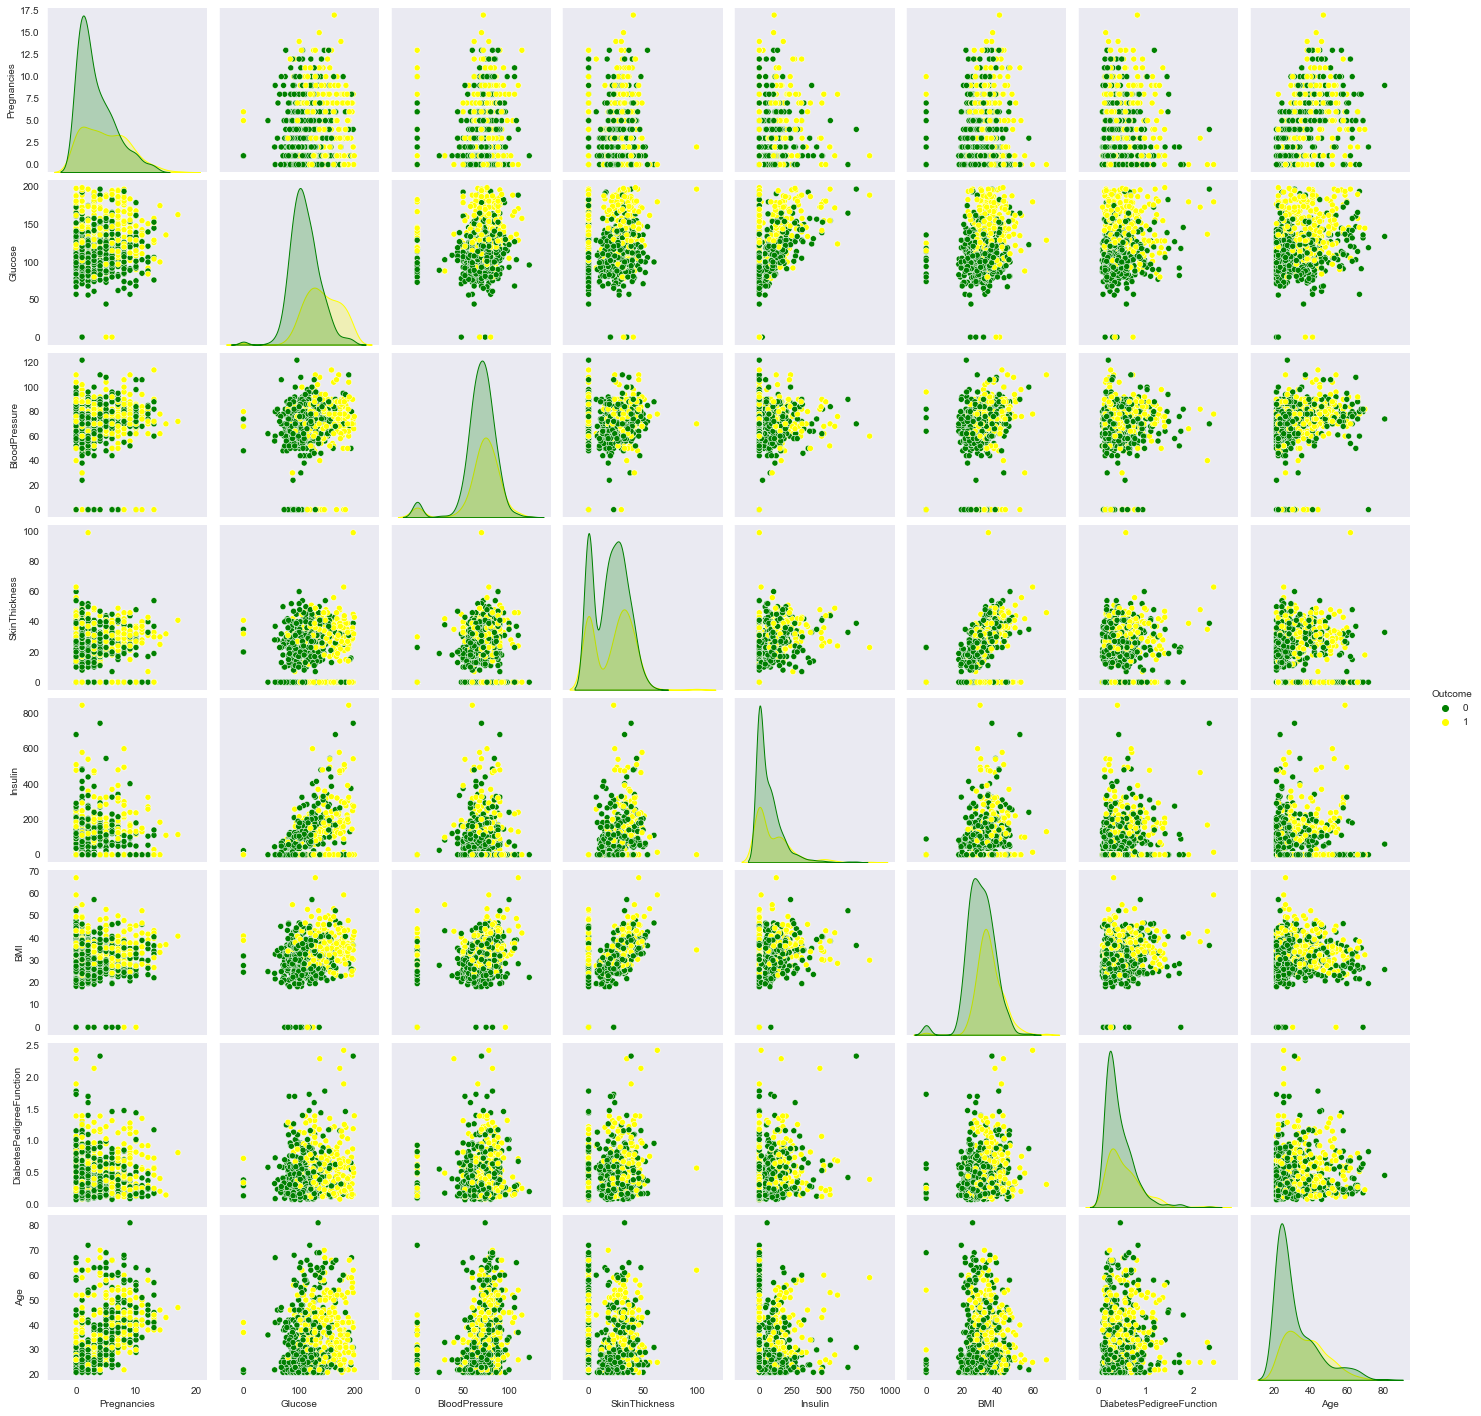

In [16]:
#pairplot allows us to visualize the distribution of single variables and relationship between two variables. The plots on diagonal helps us in seeing the distribution of single variable while the scatter plot on upper & lower triangles shows the relationship between two variables.
sns.pairplot(diabetes_df, vars=["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"],hue="Outcome",palette = ["green", "yellow"])

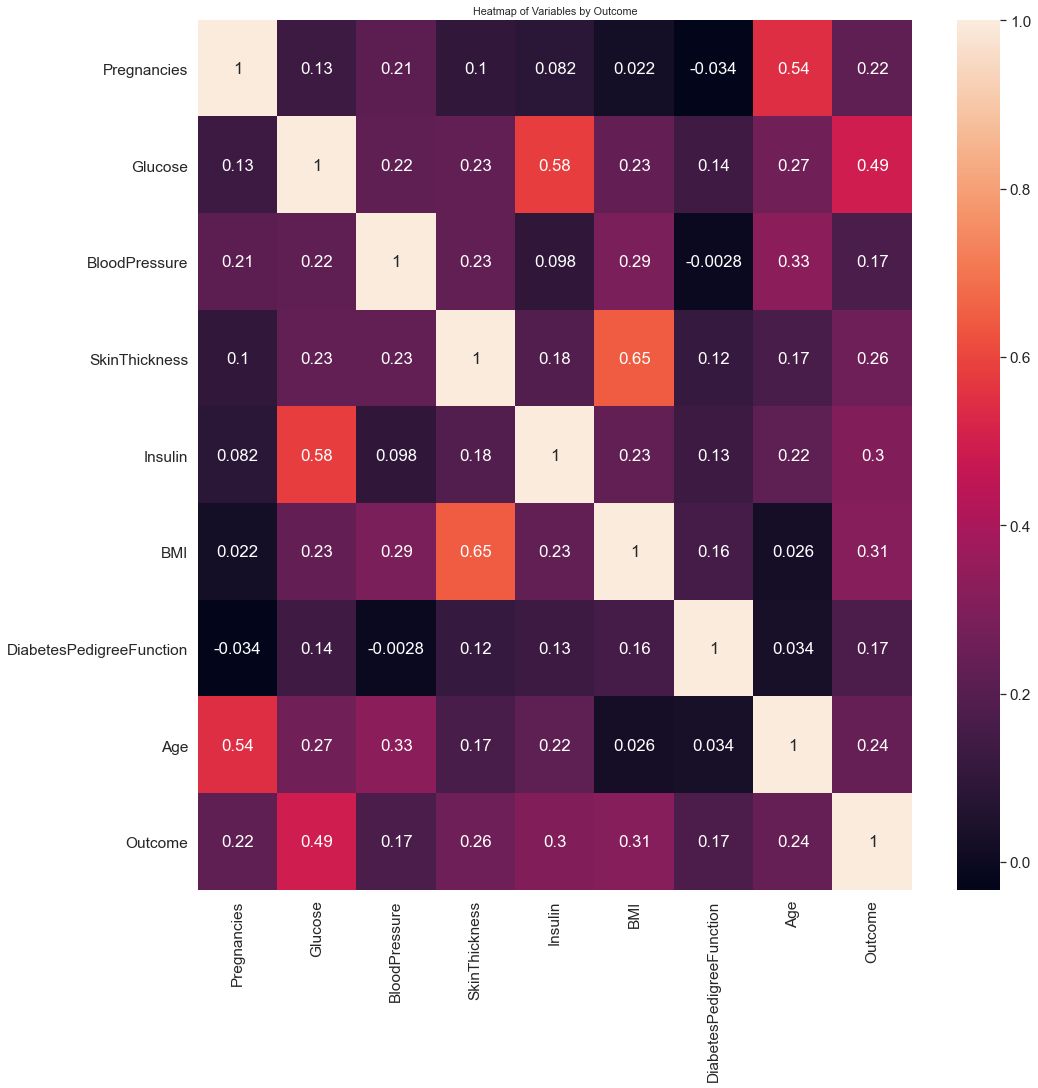

In [128]:
#Heatmap helps in finding correlation between set of variables and see which pairs are highly correlated.
sns.set(font_scale=1.4)
plt.figure(figsize = (16,16))
sns.heatmap(diabetes_df.corr(), annot=True, )
sns.set(font_scale=0.9)
plt.title("Heatmap of Variables by Outcome")
plt.savefig('Heatmap')

# Missing or Null Data points



In [18]:
diabetes_df.isnull().sum()
# but we see from the above graphs that this dataset contains missing values in disguised form, i.e., impossible zeros corresponding to various variables


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

it shows that there are not missing values in the current dataset. but from EDA, we found that there were several zeros (which are impossible in Glucose, Bloodpressure,SkinThickness, Insulin & BMI columns so we will replace these zeros by nan and then will visualize the nan values in each column and replace by suitable methods.

In [19]:
## Mark invalid zero values as NaN (null)
temp_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','Age']  
diabetes_df[temp_cols] = diabetes_df[temp_cols].replace(0, np.nan)
diabetes_df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [20]:
diabetes_df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      NaN  33.6   
1              1     85.0           66.0           29.0      NaN  26.6   
2              8    183.0           64.0            NaN      NaN  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0      NaN  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0            NaN      NaN  30.1   
767            1     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [21]:
#saving the diabetes_df_modified_for_DataRobot into csv format
diabetes_df.to_csv('diabetes_df.csv', index = False)

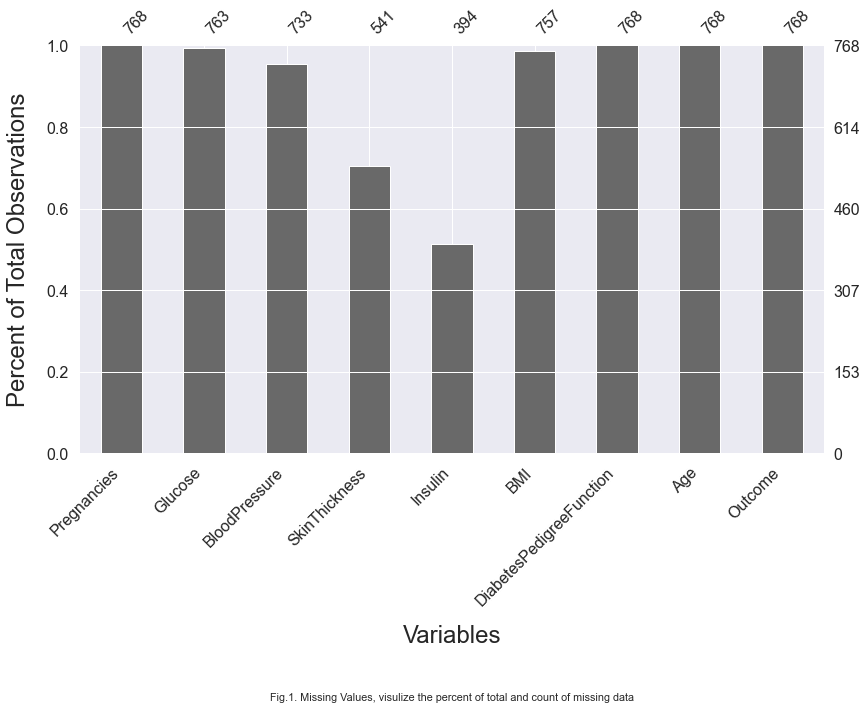

In [22]:
# Use Missingno python library to visualize null values
# Visualize the number of missing values as a bar chart
!pip install missingno
import missingno as msno
fig,ax = plt.subplots()
fig = msno.bar(diabetes_df, inline=False, figsize=(13.33,7.5))

# Add labels
ax.set_xlabel('Variables', size=24, labelpad=16)
ax.set_ylabel('Percent of Total Observations', size=24, labelpad=16)
ax.tick_params(axis='both', labelsize=16, length=8)

# Add caption
fignum = 1
figtxt = ". Missing Values, visulize the percent of total and count of missing data"
figcap = "Fig." + str(fignum) + figtxt
ax.text(0.5, -0.6, figcap, ha='center', va='center', transform=ax.transAxes)
plt.savefig('fig' + str(fignum) + '-missing-bar-chart.png', bbox_inches='tight')

plt.show()



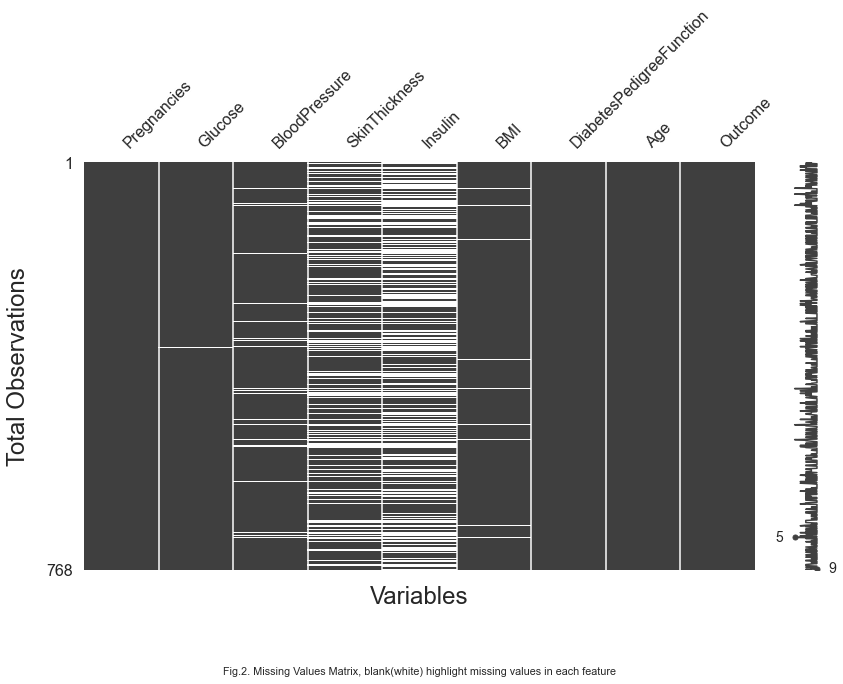

In [23]:
# Visualize the number of missing values as a matrix
fig = msno.matrix(diabetes_df, inline=False, figsize=(13.33,7.5))

# Add labels
plt.xlabel('Variables', size=24, labelpad=16)
plt.ylabel('Total Observations', size=24, labelpad=16)
plt.tick_params(axis='both', labelsize=16, length=8)

# Add caption
fignum += 1
figtxt = ". Missing Values Matrix, blank(white) highlight missing values in each feature"
figcap = "Fig." + str(fignum) + figtxt
plt.text(0.5, -0.25,figcap, ha='center', va='center', transform=fig.transAxes)
plt.savefig('fig' + str(fignum) + '-missing-data-matrix.png', bbox_inches='tight')

plt.show()

# Methods for dealing with missing values
1) deleting the rows containing missing values
2)KNN imputation
3)The Multivariate Imputation by Chained Equations (MICE) using the IterativeImputer class from scikit-learn
4)imputation of missing values by median of that column using SimpleImputer

In [24]:
#Method 1 for dealing with missing values
#print('----- all  impossible zeros deletion -----\n')

# Apply deletion of all impossible zeros from the dataset
diabetes_df_copy = diabetes_df.copy(deep=True)
print("Original Data {}".format(diabetes_df_copy.shape))
diabetes_df_copy.dropna(inplace=True)

print("After Deletion {}".format(diabetes_df_copy.shape))

# Deleted 48% of the dataset (red flag)

print('\n----- missing value Deletion -----\n')
diabetes_df_copy.shape
diabetes_df_copy.head(5)



Original Data (768, 9)
After Deletion (392, 9)

----- missing value Deletion -----



Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3             1     89.0           66.0           23.0     94.0  28.1   
4             0    137.0           40.0           35.0    168.0  43.1   
6             3     78.0           50.0           32.0     88.0  31.0   
8             2    197.0           70.0           45.0    543.0  30.5   
13            1    189.0           60.0           23.0    846.0  30.1   

    DiabetesPedigreeFunction  Age  Outcome  
3                      0.167   21        0  
4                      2.288   33        1  
6                      0.248   26        1  
8                      0.158   53        1  
13                     0.398   59        1

In [25]:
#saving the diabetes df after deletion for further processing in DataRobot
diabetes_df_copy.to_csv('diabetes_df_copy_after_deletion.csv')

In [26]:
diabetes_df_copy.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T


count        mean         std     min        5%  \
Pregnancies               392.0    3.301020    3.211424   0.000   0.00000   
Glucose                   392.0  122.627551   30.860781  56.000  81.00000   
BloodPressure             392.0   70.663265   12.496092  24.000  50.00000   
SkinThickness             392.0   29.145408   10.516424   7.000  13.00000   
Insulin                   392.0  156.056122  118.841690  14.000  42.55000   
BMI                       392.0   33.086224    7.027659  18.200  22.25500   
DiabetesPedigreeFunction  392.0    0.523046    0.345488   0.085   0.15355   
Age                       392.0   30.864796   10.200777  21.000  21.00000   
Outcome                   392.0    0.331633    0.471401   0.000   0.00000   

                               25%       50%      75%       90%        95%  \
Pregnancies                1.00000    2.0000    5.000    8.0000   10.00000   
Glucose                   99.00000  119.0000  143.000  170.9000  181.00000   
BloodPressure             62.00000   70.0000   78.000   86.0000   90.00000   
SkinThickness             21.00000   29.0000   37.000   43.0000   46.45000   
Insulin                   76.75000  125.5000  190.000  292.8000  396.50000   
BMI                       28.40000   33.2000   37.100   42.0700   45.24500   
DiabetesPedigreeFunction   0.26975    0.4495    0.687    0.9422    1.16035   
Age                       23.00000   27.0000   36.000   46.0000   52.45000   
Outcome                    0.00000    0.0000    1.000    1.0000    1.00000   

                                99%     max  
Pregnancies                13.00000   17.00  
Glucose                   196.00000  198.00  
BloodPressure             102.36000  110.00  
SkinThickness              52.00000   63.00  
Insulin                   580.89000  846.00  
BMI                        53.36200   67.10  
DiabetesPedigreeFunction    1.73842    2.42  
Age                        60.00000   81.00  
Outcome                     1.00000    1.00

In [27]:
#visualisation of data for better understanding of distribution of 'Outcome'which will show us how many person in the dataset are diabetic (1) or non-diabetic(0)
diabetes_df_copy.groupby('Outcome').size()

Outcome
0    262
1    130
dtype: int64

Text(0.5, 1.0, 'Count Plot for Outcome after deleting impossible zeros')

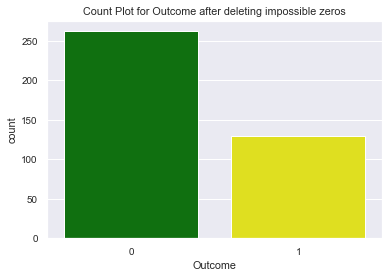

In [28]:
#plotting the distribution of outcome
sns.countplot(x='Outcome', data=diabetes_df_copy, palette = ["green", "yellow"])
plt.title('Count Plot for Outcome after deleting impossible zeros')

# it shows class imbalanced because it contains more 'non-diabetic'persons in comparison to 'diabetic'

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Boxplot for Number of Pregnancies by Outcome after deleting impossible zeros')

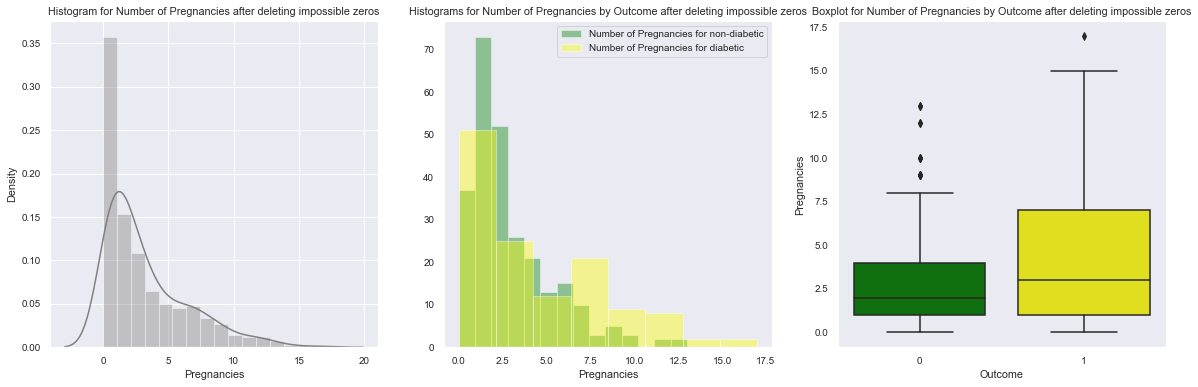

In [29]:
## Creating 3 subplots - 1st for histogram, 2nd for histogram segmented by Outcome and 3rd for representing same segmentation using boxplot
dia0_copy = diabetes_df_copy[diabetes_df_copy.Outcome==0]
dia1_copy=diabetes_df_copy[diabetes_df_copy.Outcome==1]
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Number of Pregnancies after deleting impossible zeros")
sns.distplot(diabetes_df_copy.Pregnancies, color = "grey", kde=True)
plt.subplot(1,3,2)
sns.distplot(dia0_copy.Pregnancies,kde=False,color="green", label="Number of Pregnancies for non-diabetic")
sns.distplot(dia1_copy.Pregnancies,kde=False,color = "yellow", label = "Number of Pregnancies for diabetic")
plt.title("Histograms for Number of Pregnancies by Outcome after deleting impossible zeros")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=diabetes_df_copy.Outcome,y=diabetes_df_copy.Pregnancies,palette = ["green", "yellow"])
plt.title("Boxplot for Number of Pregnancies by Outcome after deleting impossible zeros")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Boxplot for Glucose by Outcome after deleting impossible zeros')

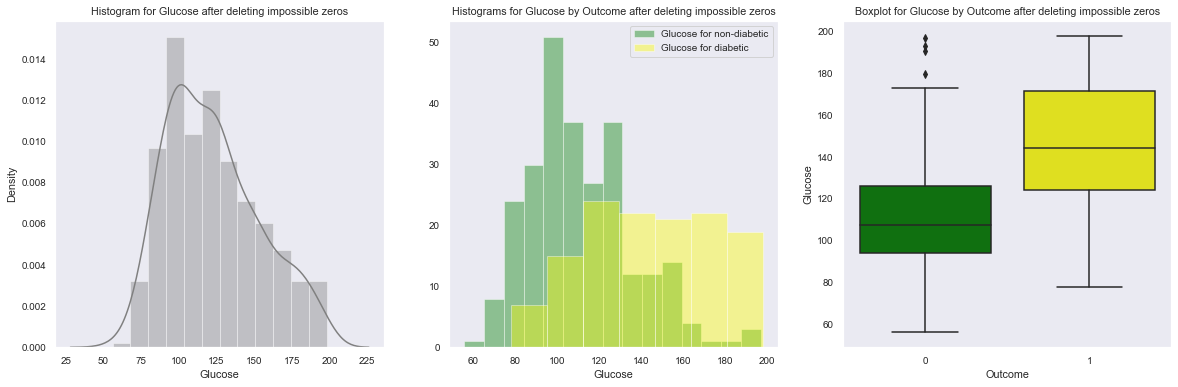

In [30]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Glucose after deleting impossible zeros")
sns.distplot(diabetes_df_copy.Glucose,color = "grey", kde=True)
plt.subplot(1,3,2)
sns.distplot(dia0_copy.Glucose,kde=False,color="green", label="Glucose for non-diabetic")
sns.distplot(dia1_copy.Glucose,kde=False,color = "yellow", label = "Glucose for diabetic")
plt.title("Histograms for Glucose by Outcome after deleting impossible zeros")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=diabetes_df_copy.Outcome,y=diabetes_df_copy.Glucose,palette = ["green", "yellow"])
plt.title("Boxplot for Glucose by Outcome after deleting impossible zeros")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Boxplot for BloodPressure by Outcome after deleting impossible zeros')

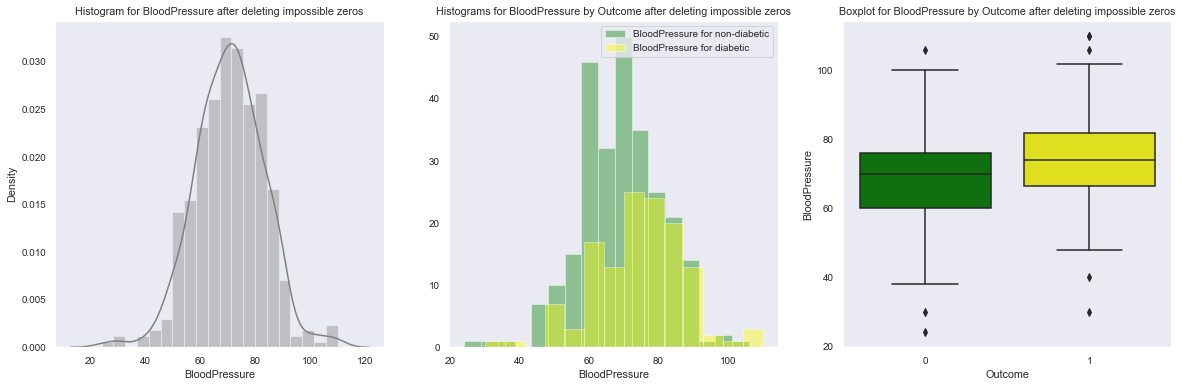

In [31]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for BloodPressure after deleting impossible zeros")
sns.distplot(diabetes_df_copy.BloodPressure,color = "grey", kde=True)
plt.subplot(1,3,2)
sns.distplot(dia0_copy.BloodPressure,kde=False,color="green", label="BloodPressure for non-diabetic")
sns.distplot(dia1_copy.BloodPressure,kde=False,color = "yellow", label = "BloodPressure for diabetic")
plt.title("Histograms for BloodPressure by Outcome after deleting impossible zeros")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=diabetes_df_copy.Outcome,y=diabetes_df_copy.BloodPressure,palette = ["green", "yellow"])
plt.title("Boxplot for BloodPressure by Outcome after deleting impossible zeros")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Boxplot for SkinThickness by Outcome after deleting impossible zeros')

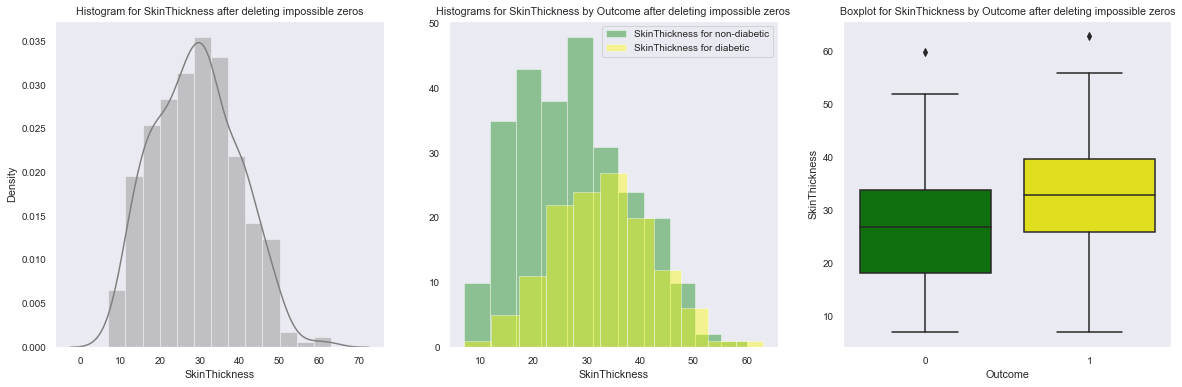

In [32]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for SkinThickness after deleting impossible zeros")
sns.distplot(diabetes_df_copy.SkinThickness,color = "grey", kde=True)
plt.subplot(1,3,2)
sns.distplot(dia0_copy.SkinThickness,kde=False,color="green", label="SkinThickness for non-diabetic")
sns.distplot(dia1_copy.SkinThickness,kde=False,color = "yellow", label = "SkinThickness for diabetic")
plt.title("Histograms for SkinThickness by Outcome after deleting impossible zeros")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=diabetes_df_copy.Outcome,y=diabetes_df_copy.SkinThickness,palette = ["green", "yellow"])
plt.title("Boxplot for SkinThickness by Outcome after deleting impossible zeros")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Boxplot for Insulin by Outcome after deleting impossible zeros')

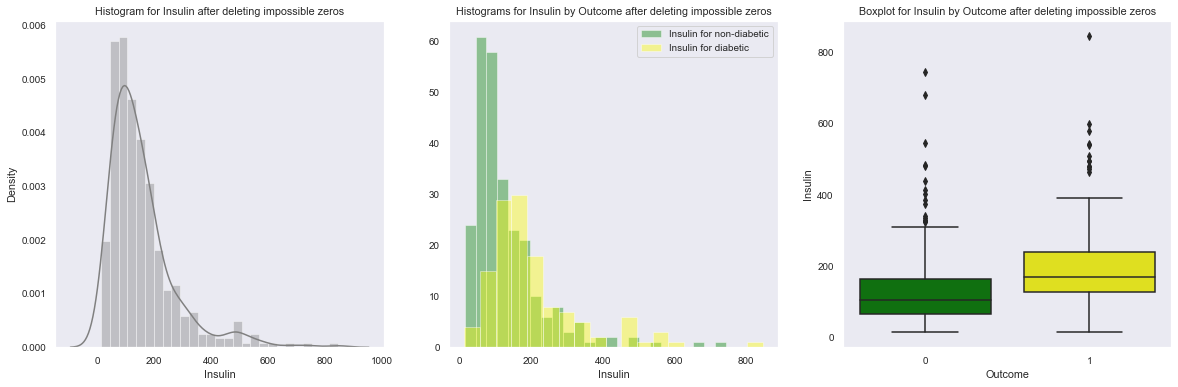

In [33]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Insulin after deleting impossible zeros")
sns.distplot(diabetes_df_copy.Insulin,color = "grey", kde=True)
plt.subplot(1,3,2)
sns.distplot(dia0_copy.Insulin,kde=False,color="green", label="Insulin for non-diabetic")
sns.distplot(dia1_copy.Insulin,kde=False,color = "yellow", label = "Insulin for diabetic")
plt.title("Histograms for Insulin by Outcome after deleting impossible zeros")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=diabetes_df_copy.Outcome,y=diabetes_df_copy.Insulin,palette = ["green", "yellow"])
plt.title("Boxplot for Insulin by Outcome after deleting impossible zeros")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Boxplot for BMI by Outcome after deleting impossible zeros')

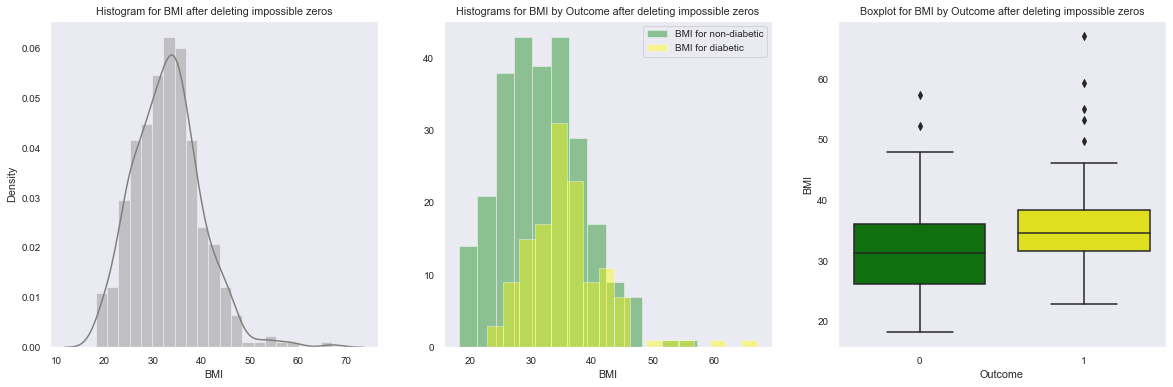

In [34]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for BMI after deleting impossible zeros")
sns.distplot(diabetes_df_copy.BMI,color = "grey", kde=True)
plt.subplot(1,3,2)
sns.distplot(dia0_copy.BMI,kde=False,color="green", label="BMI for non-diabetic")
sns.distplot(dia1_copy.BMI,kde=False,color = "yellow", label = "BMI for diabetic")
plt.title("Histograms for BMI by Outcome after deleting impossible zeros")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=diabetes_df_copy.Outcome,y=diabetes_df_copy.BMI,palette = ["green", "yellow"])
plt.title("Boxplot for BMI by Outcome after deleting impossible zeros")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Boxplot for DPF by Outcome after deleting impossible zeros')

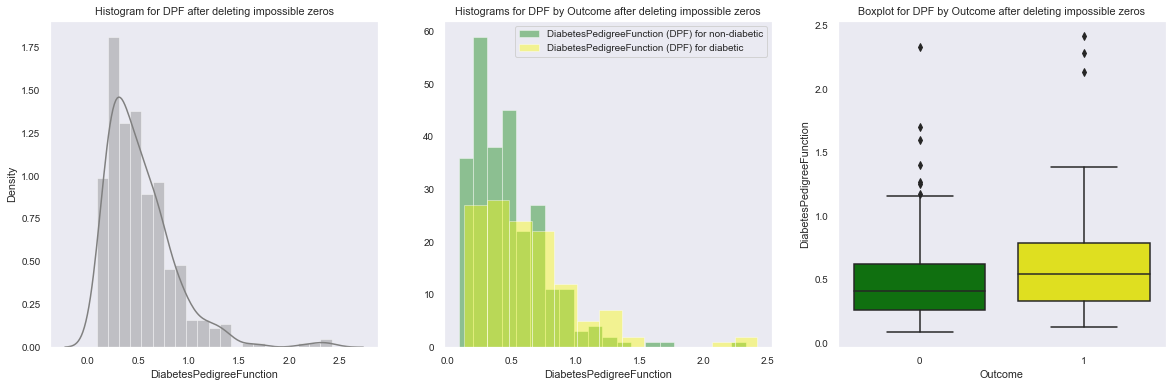

In [35]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for DPF after deleting impossible zeros")
sns.distplot(diabetes_df_copy.DiabetesPedigreeFunction,color = "grey", kde=True)
plt.subplot(1,3,2)
sns.distplot(dia0_copy.DiabetesPedigreeFunction,kde=False,color="green", label="DiabetesPedigreeFunction (DPF) for non-diabetic")
sns.distplot(dia1_copy.DiabetesPedigreeFunction,kde=False,color = "yellow", label = "DiabetesPedigreeFunction (DPF) for diabetic")
plt.title("Histograms for DPF by Outcome after deleting impossible zeros")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=diabetes_df_copy.Outcome,y=diabetes_df.DiabetesPedigreeFunction,palette = ["green", "yellow"])
plt.title("Boxplot for DPF by Outcome after deleting impossible zeros")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Boxplot for Age by Outcome after deleting impossible zeros')

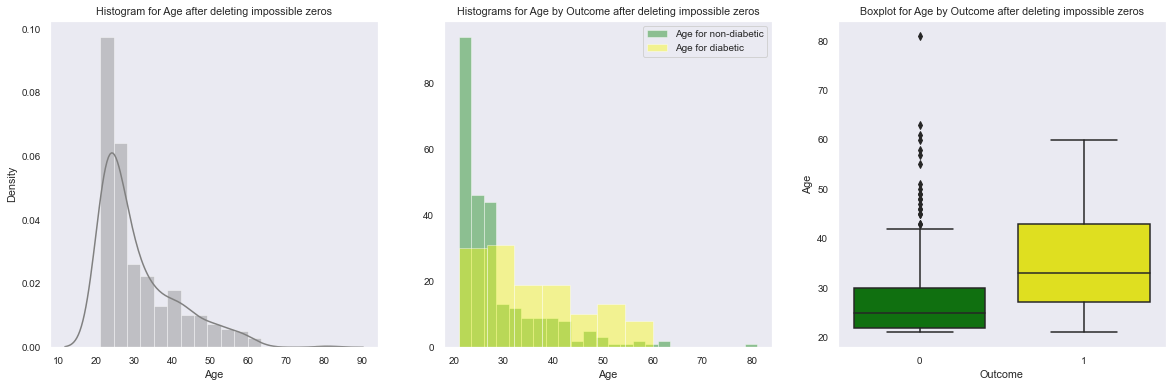

In [36]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Age after deleting impossible zeros")
sns.distplot(diabetes_df_copy.Age,color = "grey", kde=True)
plt.subplot(1,3,2)
sns.distplot(dia0_copy.Age,kde=False,color="green", label="Age for non-diabetic")
sns.distplot(dia1_copy.Age,kde=False,color = "yellow", label = "Age for diabetic")
plt.title("Histograms for Age by Outcome after deleting impossible zeros")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=diabetes_df_copy.Outcome,y=diabetes_df_copy.Age,palette = ["green", "yellow"])
plt.title("Boxplot for Age by Outcome after deleting impossible zeros")

<Figure size 1800x1800 with 0 Axes>

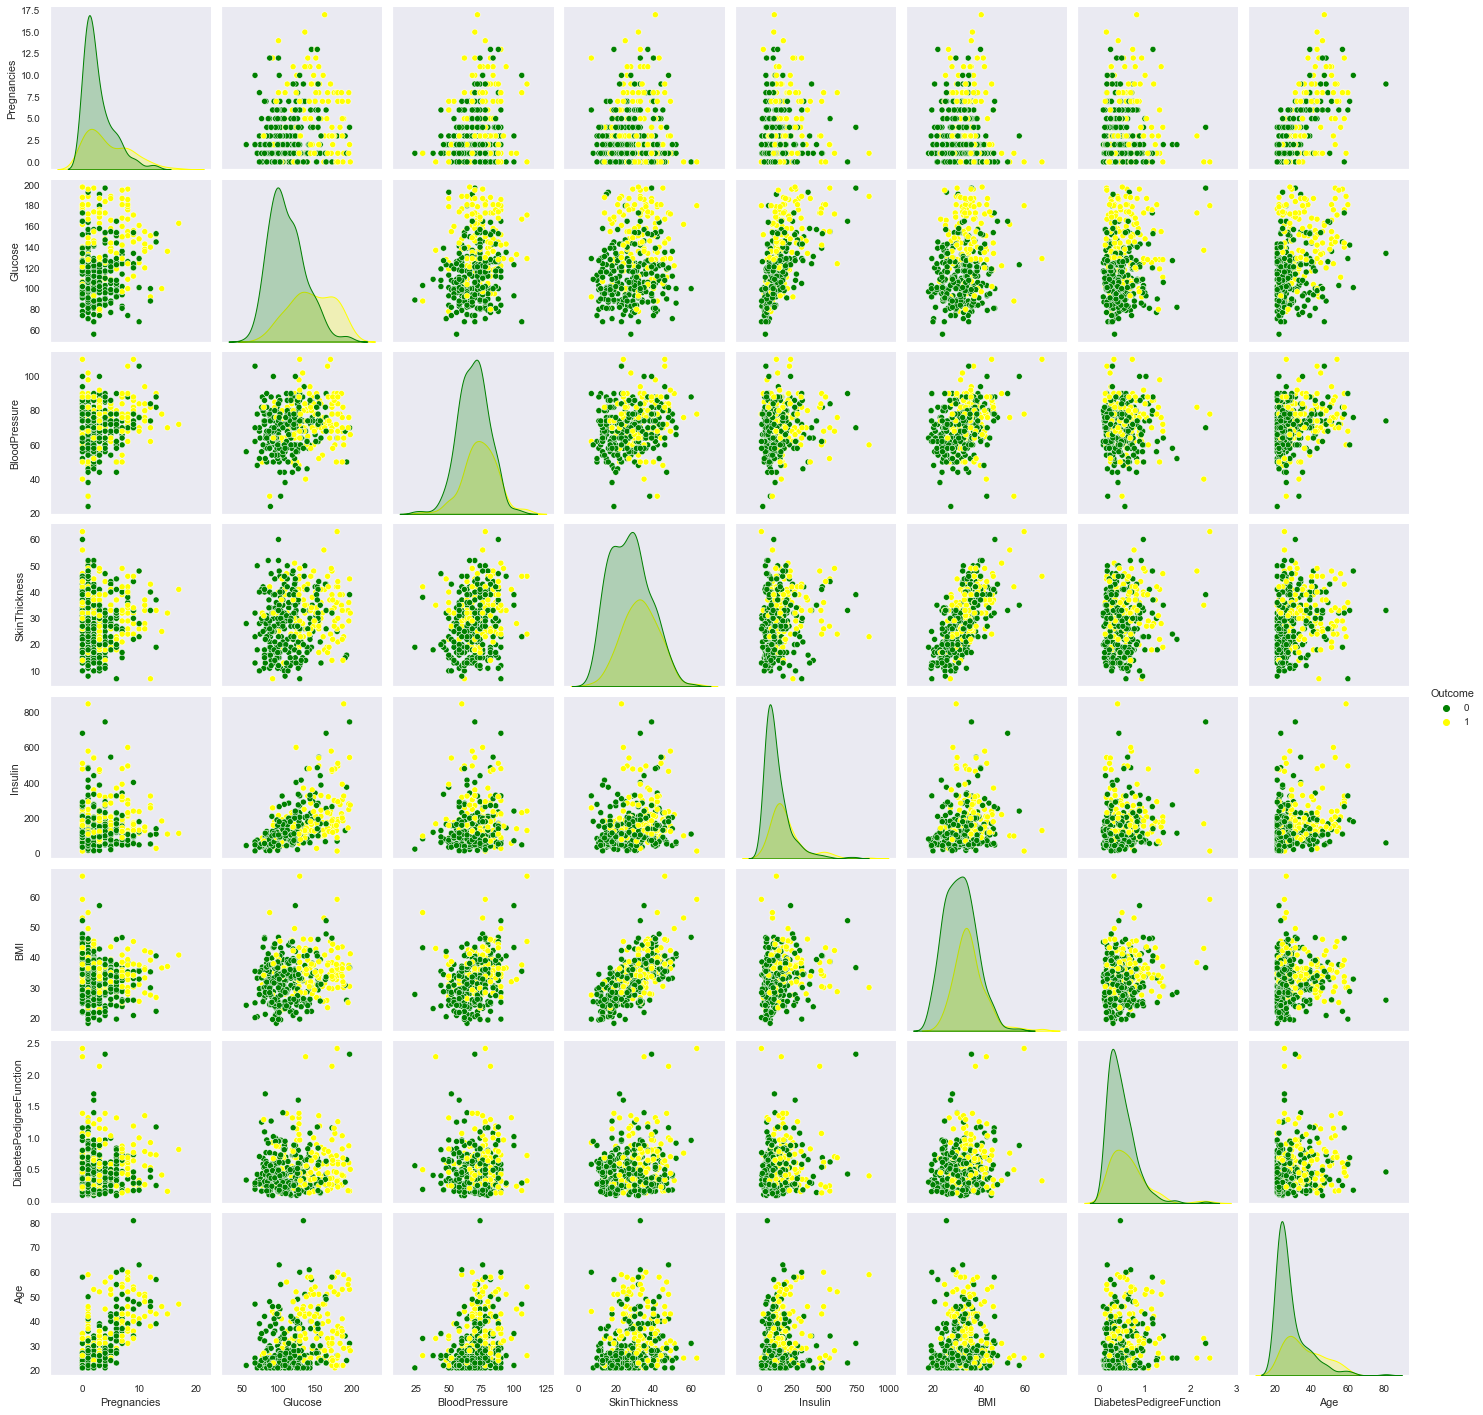

In [37]:
plt.figure(figsize = (25,25))
sns.pairplot(diabetes_df_copy, vars=["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"],hue="Outcome",palette = ["green", "yellow"])

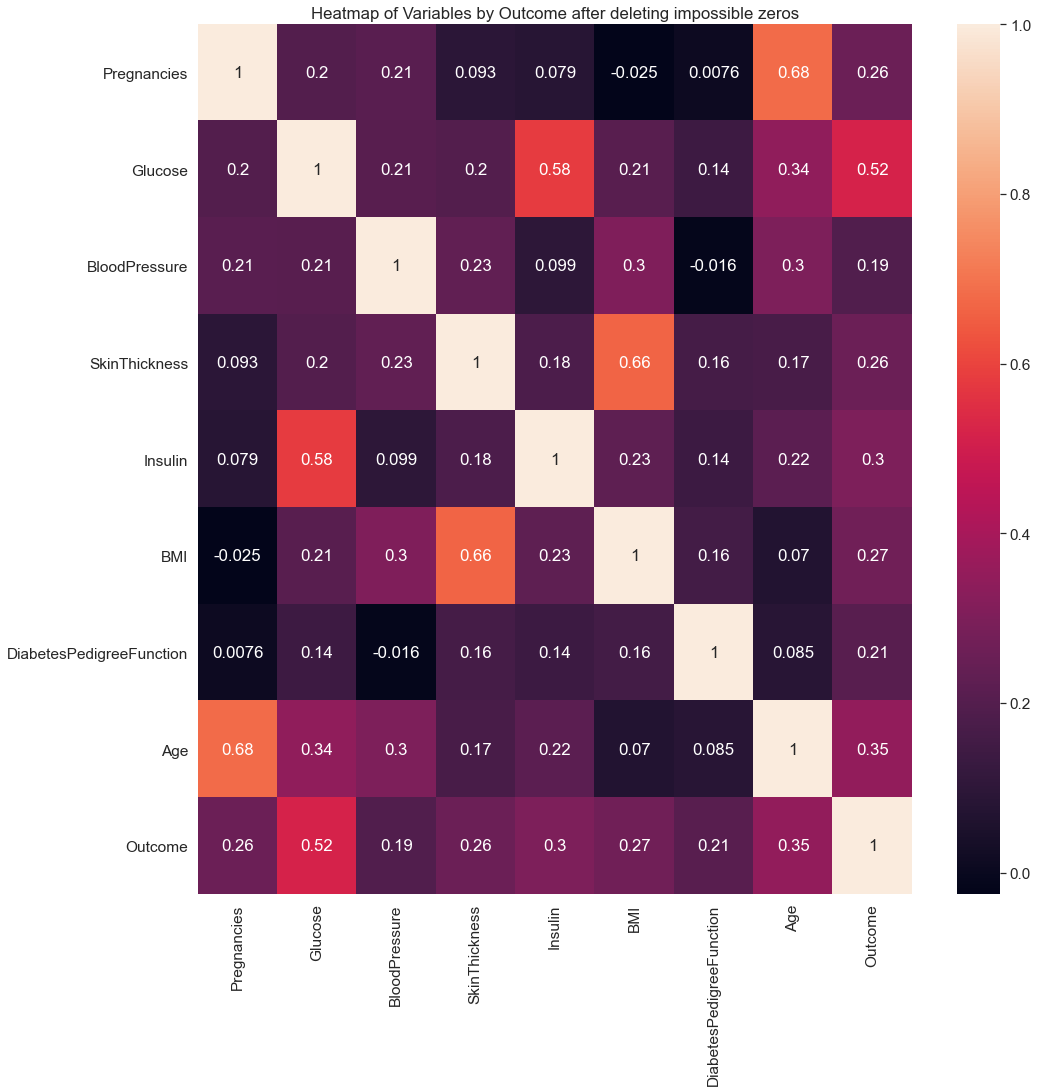

In [129]:
sns.set(font_scale=1.4)
plt.figure(figsize = (16,16))
sns.heatmap(diabetes_df_copy.corr(), annot=True)
plt.title("Heatmap of Variables by Outcome after deleting impossible zeros")
plt.savefig('Heatmap2')

# ML models 

In [39]:
# Define X and y
# Define X and y
# Define X and y
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']



X = diabetes_df_copy[diabetes_df_copy.columns[:-1]]
y = diabetes_df_copy.Outcome

In [40]:
#Train/Test Split with Scikit Learn :
#Next, we can split the features and responses into train and test portions. We stratify (a process where each response class should be represented with equal proportions in each of the portions) the samples.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

In [41]:
#scaling the data as there is huge difference in magnitude of data in each column
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
# Splitting the dataset into training & test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=diabetes_df_copy.Outcome,random_state=0)


In [44]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [45]:
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.724490
1  SVC  0.724490
2   LR  0.755102
3   DT  0.724490
4  GNB  0.775510
5   RF  0.734694
6   GB  0.806122


In [46]:
#StratifiedK-Fold Cross-Validation
names = []
scores = []
for name, model in models:
    
    skfold = StratifiedKFold(n_splits=10) 
    score = cross_val_score(model, X_scaled, y, cv=skfold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)
skf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(skf_cross_val)

  Name     Score
0  KNN  0.770385
1  SVC  0.767821
2   LR  0.780385
3   DT  0.708974
4  GNB  0.772692
5   RF  0.785641
6   GB  0.796090


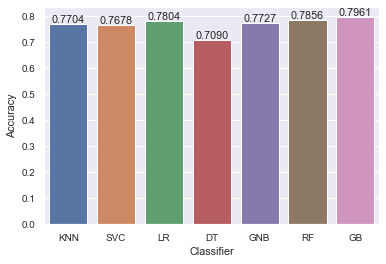

In [47]:
axis = sns.barplot(x = 'Name', y = 'Score', data = skf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 

plt.show()


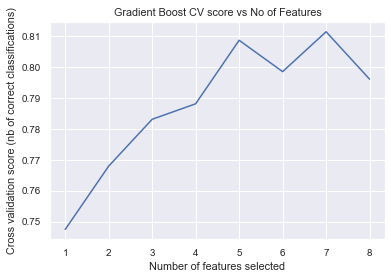

In [48]:
from sklearn.model_selection import StratifiedKFold

from sklearn.feature_selection import RFECV


gb_model = GradientBoostingClassifier()
gb_rfecv = RFECV(estimator=gb_model, step=1, cv=skfold, scoring='accuracy')
gb_rfecv.fit(X_scaled, y)
plt.figure()
plt.title('Gradient Boost CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(gb_rfecv.grid_scores_) + 1), gb_rfecv.grid_scores_)
plt.show()



In [49]:
#We can see that having 5 input features generates the maximum accuracy.
feature_importance = list(zip(feature_names, gb_rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [50]:
new_features=['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

df_X= pd.DataFrame(X_scaled)
df_X.columns=diabetes_df_copy.columns[:-1]
df_X.head(2)
df_X.shape



(392, 8)

In [51]:
df_X[['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
df_X.isnull().sum()
X_new = df_X[new_features]
X_new.shape



(392, 7)

In [52]:
#The above 7 features are most suitable for the model. We can compare the accuracy before and after feature selection.

initial_score = cross_val_score(gb_model, X_scaled, y, cv=skfold, scoring='accuracy').mean()
print("Initial accuracy : {} ".format(initial_score))
fe_score = cross_val_score(gb_model,X_new , y, cv=skfold, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))


Initial accuracy : 0.7935256410256409 
Accuracy after Feature Selection : 0.8114102564102564 


In [53]:
#Logistic Regression — Feature Selection
from sklearn.model_selection import StratifiedKFold

from sklearn.feature_selection import RFECV
logreg_model = LogisticRegression()
rfecv = RFECV(estimator=logreg_model, step=1, cv=skfold, scoring='accuracy')
rfecv.fit(X_scaled, y)


RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=LogisticRegression(), scoring='accuracy')

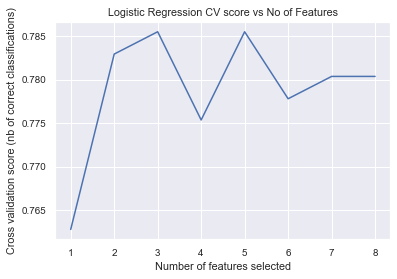

In [54]:
plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [55]:
feature_importance = list(zip(feature_names, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)


['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [56]:
new_features=['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']

df_X= pd.DataFrame(X_scaled)
df_X.columns=diabetes_df_copy.columns[:-1]
df_X.head(2)

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.717427 -1.091046      -0.373655      -0.585110 -0.522842 -0.710421   
1    -1.029213  0.466314      -2.456964       0.557421  0.100631  1.426730   

   DiabetesPedigreeFunction       Age  
0                 -1.031876 -0.968299  
1                  5.115111  0.209585

In [57]:
df_X[['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
df_X.isnull().sum()
X_new = df_X[new_features]

In [58]:
# Calculate accuracy scores

initial_score = cross_val_score(logreg_model, X_scaled, y, cv=skfold, scoring='accuracy').mean()
print("Initial accuracy : {} ".format(initial_score))
fe_score = cross_val_score(logreg_model, X_new, y, cv=skfold, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))

Initial accuracy : 0.7803846153846153 
Accuracy after Feature Selection : 0.7855128205128205 


We can see that there is slight increase in accuracy after the feature selection.
##but its accuracy is still less than GB

In [59]:
#method 2 for dealing with missing values
from sklearn.impute import KNNImputer
feature_names=diabetes_df.columns[:-1]
# Define X and y
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X_knn = diabetes_df[feature_names]
y_knn = diabetes_df.Outcome


# Print data details before imputation
print('----- See Original Count, Mean, and STD -----\n')
print(X_knn.describe())

knn_imputer = KNNImputer(n_neighbors=2, weights='uniform')
Xtrans_knn = knn_imputer.fit_transform(X_knn)

# Print data details after imputation
print('\n----- See Changes in Count, Mean, and STD -----\n')
print(pd.DataFrame(Xtrans_knn, columns=X_knn.columns).describe())

#By KNN imputation method,there was very small change in value of all variables and even without changing the count of rows
#diabetes new data after knn imputation that will be used for classification algorithm




----- See Original Count, Mean, and STD -----

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  763.000000     733.000000     541.000000  394.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.535641      12.382158      10.476982  118.775855   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      22.000000   76.250000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  141.000000      80.000000      36.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  757.000000                768.000000  768.000000  
mean    32.457464                  0.471876   33.240885  
std      6.924988                  0.331329   11.760232  
min     18.200000                  0

In [60]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [61]:
scaler = StandardScaler()
X_knn_scaled = scaler.fit_transform(Xtrans_knn)


In [62]:
# Splitting the dataset into training & test data
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_knn_scaled, y_knn, stratify=diabetes_df.Outcome,random_state=0)

In [63]:
names = []
scores = []
for name, model in models:
    model.fit(X_knn_train, y_knn_train)
    y_pred_knn = model.predict(X_knn_test)
    scores.append(accuracy_score(y_knn_test, y_pred_knn))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.718750
1  SVC  0.760417
2   LR  0.750000
3   DT  0.692708
4  GNB  0.765625
5   RF  0.744792
6   GB  0.802083


In [64]:
names = []
scores = []
for name, model in models:
    
    skfold = StratifiedKFold(n_splits=10) 
    score = cross_val_score(model, X_knn_scaled, y_knn, cv=skfold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)
skf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(skf_cross_val)

  Name     Score
0  KNN  0.737047
1  SVC  0.764337
2   LR  0.772163
3   DT  0.690157
4  GNB  0.743541
5   RF  0.756545
6   GB  0.757861


We can plot the accuracy scores using seaborn

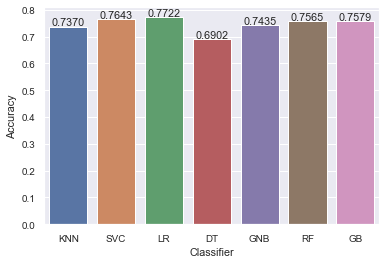

In [65]:
axis = sns.barplot(x = 'Name', y = 'Score', data = skf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [66]:
#Logistic Regression — Feature Selection
from sklearn.model_selection import StratifiedKFold

from sklearn.feature_selection import RFECV
logreg_model = LogisticRegression()
rfecv = RFECV(estimator=logreg_model, step=1, cv=skfold, scoring='accuracy')
rfecv.fit(X_knn_scaled, y_knn)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=LogisticRegression(), scoring='accuracy')

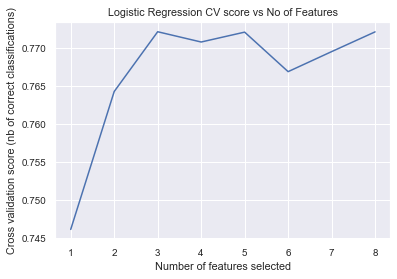

In [67]:
plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [68]:
feature_importance = list(zip(feature_names, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['Pregnancies', 'Glucose', 'BMI']


In [69]:
new_features=["Pregnancies", "Glucose", "BMI"]

df_X_knn= pd.DataFrame(X_knn_scaled)
df_X_knn.columns=diabetes_df.columns[:-1]
df_X_knn.head(2)


Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.865796      -0.028905       0.598936 -0.398803  0.169204   
1    -0.844885 -1.197276      -0.517685      -0.015057 -0.632068 -0.846646   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672

In [70]:
df_X_knn[["Pregnancies", "Glucose", "BMI"]]
df_X_knn.isnull().sum()
X_knn_new = df_X_knn[new_features]

In [71]:
# Calculate accuracy scores

initial_score = cross_val_score(logreg_model, X_knn_scaled, y_knn, cv=skfold, scoring='accuracy').mean()
print("Initial accuracy : {} ".format(initial_score))
fe_score = cross_val_score(logreg_model, X_knn_new, y_knn, cv=skfold, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))


Initial accuracy : 0.7721633629528366 
Accuracy after Feature Selection : 0.7721804511278195 


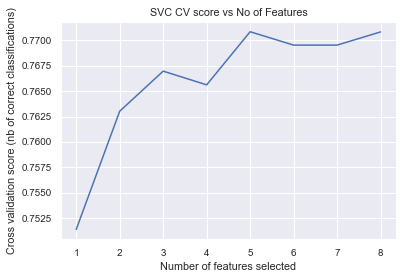

In [72]:
svc_model = SVC(kernel = "linear")


svc_rfecv = RFECV(estimator=svc_model, step=1, cv=skfold, scoring='accuracy')
svc_rfecv.fit(X_knn_scaled, y_knn)

plt.figure()
plt.title('SVC CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(svc_rfecv.grid_scores_) + 1), svc_rfecv.grid_scores_)
plt.show()

In [73]:
feature_importance = list(zip(feature_names, svc_rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']


The above 5 features are most suitable for the model. We can compare the accuracy before and after feature selection.

In [74]:
new_features_svc=["Pregnancies", "Glucose","Insulin", "BMI","DiabetesPedigreeFunction"]

df_X_knn= pd.DataFrame(X_knn_scaled)
df_X_knn.columns=diabetes_df.columns[:-1]
df_X_knn.head(2)

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.865796      -0.028905       0.598936 -0.398803  0.169204   
1    -0.844885 -1.197276      -0.517685      -0.015057 -0.632068 -0.846646   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672

In [75]:
X_knn_svc = df_X_knn[new_features_svc]

X_knn_svc.head(2)


Pregnancies   Glucose   Insulin       BMI  DiabetesPedigreeFunction
0     0.639947  0.865796 -0.398803  0.169204                  0.468492
1    -0.844885 -1.197276 -0.632068 -0.846646                 -0.365061

In [76]:
initial_score = cross_val_score(svc_model, X_knn_scaled, y_knn, cv=skfold, scoring='accuracy').mean()
print("Initial accuracy : {} ".format(initial_score))
fe_score = cross_val_score(svc_model, X_knn_svc, y_knn, cv=skfold, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))


Initial accuracy : 0.7708304853041695 
Accuracy after Feature Selection : 0.7721462747778538 


In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
# Specify parameters
c_values = list(np.arange(1, 10))
param_grid = [
    {'C': c_values, 'penalty': ['l1'], 'solver' : ['liblinear'], 'multi_class' : ['ovr']},
    {'C': c_values, 'penalty': ['l2'], 'solver' : ['liblinear', 'newton-cg', 'lbfgs'], 'multi_class' : ['ovr']}
]

In [79]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=skfold, scoring='accuracy')
grid.fit(X_knn_new, y_knn)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'multi_class': ['ovr'], 'penalty': ['l1'],
                          'solver': ['liblinear']},
                         {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'multi_class': ['ovr'], 'penalty': ['l2'],
                          'solver': ['liblinear', 'newton-cg', 'lbfgs']}],
             scoring='accuracy')

In [80]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'}
LogisticRegression(C=1, multi_class='ovr', solver='newton-cg')


In [81]:
logreg_new = LogisticRegression(C=1, multi_class='ovr', penalty='l2', solver='newton-cg')
initial_score = cross_val_score(logreg_new, X_knn_new, y_knn, cv=skfold, scoring='accuracy').mean()
print("Final accuracy : {} ".format(initial_score))


Final accuracy : 0.7721804511278195 


In [82]:
#method 3 for dealing with missing values
#The Multivariate Imputation by Chained Equations (MICE) uses the IterativeImputer class from scikit-learn 
#to support iterative imputation. The strategy models each feature with missing values as a function of other features in a round-robin fashion. 
#The algorithm performs multiple regressions over random samples of the data, then takes the average of the multiple regression values and uses that value to impute the missing value.
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Define X and y
X_mice = diabetes_df[diabetes_df.columns[:-1]]
y_mice = diabetes_df.Outcome


# Print total missing before imputation
print('----- See Original Count, Mean, and STD -----\n')
print(X_mice.describe())

mice_imputer = IterativeImputer() # default max_iter=10 for rounds of imputation
Xtrans_mice = mice_imputer.fit_transform(X_mice)

# Print total missing after imputation
print('\n----- See Changes in Count, Mean, and STD -----\n')
print(pd.DataFrame(Xtrans_mice, columns=X_mice.columns).describe())



----- See Original Count, Mean, and STD -----

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  763.000000     733.000000     541.000000  394.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.535641      12.382158      10.476982  118.775855   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      22.000000   76.250000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  141.000000      80.000000      36.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  757.000000                768.000000  768.000000  
mean    32.457464                  0.471876   33.240885  
std      6.924988                  0.331329   11.760232  
min     18.200000                  0

In [83]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [84]:
scaler = StandardScaler()
X_mice_scaled = scaler.fit_transform(Xtrans_mice)
X_mice_scaled

array([[ 0.63994726,  0.86571155, -0.02903387, ...,  0.16831005,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20347832, -0.52329612, ..., -0.85006189,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01526148, -0.6880502 , ..., -1.33015152,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02108411, -0.02903387, ..., -0.90825457,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14313731, -1.01755837, ..., -0.34087592,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94072405, -0.19378795, ..., -0.29723141,
        -0.47378505, -0.87137393]])

In [85]:
# Splitting the dataset into training & test data
X_mice_train, X_mice_test, y_mice_train, y_mice_test = train_test_split(X_mice_scaled, y_mice, stratify=diabetes_df.Outcome, random_state=0)

In [86]:
names = []
scores = []
for name, model in models:
    model.fit(X_mice_train, y_mice_train)
    y_pred_mice = model.predict(X_mice_test)
    scores.append(accuracy_score(y_mice_test, y_pred_mice))
    names.append(name)
tr_split_mice = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.718750
1  SVC  0.760417
2   LR  0.750000
3   DT  0.692708
4  GNB  0.765625
5   RF  0.744792
6   GB  0.802083


In [87]:
names = []
scores = []
for name, model in models:
    
    skfold = StratifiedKFold(n_splits=10) 
    score = cross_val_score(model, X_mice_scaled, y_mice, cv=skfold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)
skf_cross_val_mice = pd.DataFrame({'Name': names, 'Score': scores})
print(skf_cross_val_mice)

  Name     Score
0  KNN  0.747386
1  SVC  0.756511
2   LR  0.766934
3   DT  0.695301
4  GNB  0.756528
5   RF  0.761705
6   GB  0.770848


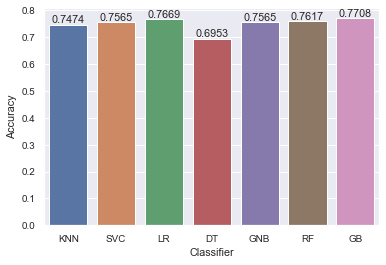

In [88]:
axis = sns.barplot(x = 'Name', y = 'Score', data = skf_cross_val_mice)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

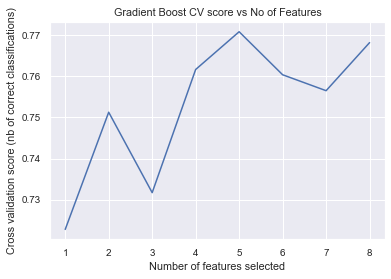

In [89]:
gb_model = GradientBoostingClassifier()
gb_rfecv = RFECV(estimator=gb_model, step=1, cv=skfold, scoring='accuracy')
gb_rfecv.fit(X_mice_scaled, y_mice)
plt.figure()
plt.title('Gradient Boost CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(gb_rfecv.grid_scores_) + 1), gb_rfecv.grid_scores_)
plt.show()

In [90]:
#We can see that having 5 input features generates the maximum accuracy.
feature_importance = list(zip(feature_names, gb_rfecv.support_))
new_features_mice = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features_mice.append(value[0])
        
print(new_features_mice)

['Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [91]:
new_features_mice=['Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

df_X_mice= pd.DataFrame(X_mice_scaled)
df_X_mice.columns=diabetes_df.columns[:-1]
df_X_mice.head(2)
df_X_mice[['Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
df_X_mice.isnull().sum()
X_mice_new = df_X_mice[new_features_mice]

In [92]:
#The above 5 features are most suitable for the model. We can compare the accuracy before and after feature selection.

initial_score = cross_val_score(gb_model, X_mice_scaled, y_mice, cv=skfold, scoring='accuracy').mean()
print("Initial accuracy : {} ".format(initial_score))
fe_score = cross_val_score(gb_model,X_mice_new , y_mice, cv=skfold, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))


Initial accuracy : 0.7656356801093642 
Accuracy after Feature Selection : 0.769583048530417 


In [93]:
#Logistic Regression — Feature Selection
from sklearn.model_selection import StratifiedKFold

from sklearn.feature_selection import RFECV
logreg_model = LogisticRegression()
rfecv = RFECV(estimator=logreg_model, step=1, cv=skfold, scoring='accuracy')
rfecv.fit(X_mice_scaled, y_mice)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=LogisticRegression(), scoring='accuracy')

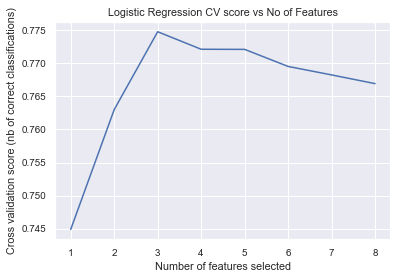

In [94]:
plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [95]:
feature_importance = list(zip(feature_names, rfecv.support_))
new_features_mice_lr = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features_mice_lr.append(value[0])
        
print(new_features_mice_lr)

['Pregnancies', 'Glucose', 'BMI']


In [96]:
new_features_mice_lr=['Pregnancies', 'Glucose', 'BMI']

df_X_mice= pd.DataFrame(X_mice_scaled)
df_X_mice.columns=diabetes_df.columns[:-1]
df_X_mice.head(2)
df_X_mice[['Pregnancies', 'Glucose', 'BMI']]
df_X_mice.isnull().sum()
X_mice_new_lr = df_X_mice[new_features_mice_lr]


In [97]:
# Calculate accuracy scores

initial_score = cross_val_score(logreg_model, X_mice_scaled, y_mice, cv=skfold, scoring='accuracy').mean()
print("Initial accuracy : {} ".format(initial_score))
fe_score = cross_val_score(logreg_model, X_mice_new_lr, y_mice, cv=skfold, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))


Initial accuracy : 0.7669343814080657 
Accuracy after Feature Selection : 0.7747778537252221 


In [98]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [99]:
# Specify parameters
c_values = list(np.arange(1, 10))
param_grid = [
    {'C': c_values, 'penalty': ['l1'], 'solver' : ['liblinear'], 'multi_class' : ['ovr']},
    {'C': c_values, 'penalty': ['l2'], 'solver' : ['liblinear', 'newton-cg', 'lbfgs'], 'multi_class' : ['ovr']}
]

In [100]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=skfold, scoring='accuracy')
grid.fit(X_mice_new_lr, y_mice)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'multi_class': ['ovr'], 'penalty': ['l1'],
                          'solver': ['liblinear']},
                         {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'multi_class': ['ovr'], 'penalty': ['l2'],
                          'solver': ['liblinear', 'newton-cg', 'lbfgs']}],
             scoring='accuracy')

In [101]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(C=1, multi_class='ovr', penalty='l1', solver='liblinear')


In [102]:
logreg_new = LogisticRegression(C=1, multi_class='ovr', penalty='l1', solver='liblinear')
initial_score = cross_val_score(logreg_new, X_mice_new_lr, y_mice, cv=skfold, scoring='accuracy').mean()
print("Final accuracy : {} ".format(initial_score))

Final accuracy : 0.7747778537252221 


In [103]:
#method 4 for dealing with missing values
#example of imputing missing values using scikit-learn
from sklearn.impute import SimpleImputer
# Define X and y
X_simple_imput = diabetes_df[diabetes_df.columns[:-1]]
y_median = diabetes_df.Outcome

# define the imputer
imputer = SimpleImputer(strategy='median')
# Fit on the dataset
imputer.fit(X_simple_imput)

# Transform the dataset
Xtrans_median = imputer.transform(X_simple_imput)

# Print total missing before imputation
print('----- See Original Count, Mean, and STD -----\n')
print(X_simple_imput.describe())


# Print total missing after imputation
print('\n----- See Changes in Count, Mean, and STD -----\n')
print(pd.DataFrame(Xtrans_median, columns=X_simple_imput.columns).describe())



----- See Original Count, Mean, and STD -----

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  763.000000     733.000000     541.000000  394.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.535641      12.382158      10.476982  118.775855   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      22.000000   76.250000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  141.000000      80.000000      36.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  757.000000                768.000000  768.000000  
mean    32.457464                  0.471876   33.240885  
std      6.924988                  0.331329   11.760232  
min     18.200000                  0

In [104]:
scaler = StandardScaler()
X_median_scaled = scaler.fit_transform(Xtrans_median)

In [105]:
# Splitting the dataset into training & test data
X_median_train, X_median_test, y_median_train, y_median_test = train_test_split(X_median_scaled, y_median, stratify=diabetes_df.Outcome,random_state=0)


In [106]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))


In [107]:
names = []
scores = []
for name, model in models:
    model.fit(X_median_train, y_median_train)
    y_pred_median = model.predict(X_median_test)
    scores.append(accuracy_score(y_median_test, y_pred_median))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.713542
1  SVC  0.760417
2   LR  0.750000
3   DT  0.703125
4  GNB  0.750000
5   RF  0.786458
6   GB  0.770833


In [108]:
names = []
scores = []
for name, model in models:
    
    skfold = StratifiedKFold(n_splits=10) 
    score = cross_val_score(model, X_median_scaled, y_median, cv=skfold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)
skf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(skf_cross_val)


  Name     Score
0  KNN  0.751213
1  SVC  0.753913
2   LR  0.766951
3   DT  0.692806
4  GNB  0.750000
5   RF  0.756425
6   GB  0.766934


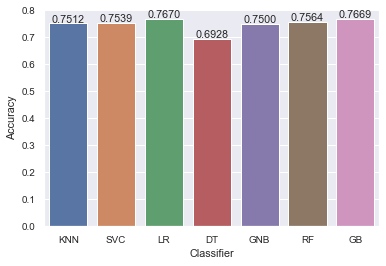

In [109]:
axis = sns.barplot(x = 'Name', y = 'Score', data = skf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [110]:
#Logistic Regression — Feature Selection
from sklearn.model_selection import StratifiedKFold

from sklearn.feature_selection import RFECV
logreg_model = LogisticRegression()
rfecv = RFECV(estimator=logreg_model, step=1, cv=skfold, scoring='accuracy')
rfecv.fit(X_median_scaled, y_median)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=LogisticRegression(), scoring='accuracy')

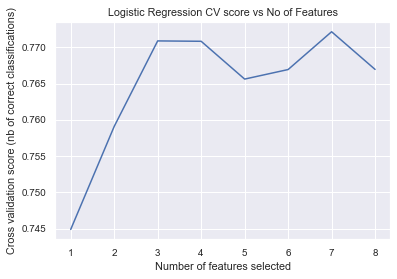

In [111]:
plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [112]:
feature_importance = list(zip(feature_names, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [113]:
new_features=['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

df_X_median= pd.DataFrame(X_median_scaled)
df_X_median.columns=diabetes_df.columns[:-1]
df_X_median.head(2)
df_X_median[['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
df_X_median.isnull().sum()
X_median_new = df_X_median[new_features]

In [114]:
# Calculate accuracy scores

initial_score = cross_val_score(logreg_model, X_median_scaled, y_median, cv=skfold, scoring='accuracy').mean()
print("Initial accuracy : {} ".format(initial_score))
fe_score = cross_val_score(logreg_model, X_median_new, y_median, cv=skfold, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))

Initial accuracy : 0.7669514695830485 
Accuracy after Feature Selection : 0.7721462747778538 


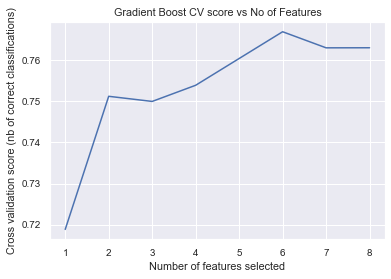

In [115]:
gb_model = GradientBoostingClassifier()
gb_rfecv = RFECV(estimator=gb_model, step=1, cv=skfold, scoring='accuracy')
gb_rfecv.fit(X_median_scaled, y_median)
plt.figure()
plt.title('Gradient Boost CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(gb_rfecv.grid_scores_) + 1), gb_rfecv.grid_scores_)
plt.show()

In [116]:
feature_importance = list(zip(feature_names, gb_rfecv.support_))
new_features_median = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features_median.append(value[0])
        
print(new_features_median)

['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [117]:
new_features=['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

df_X_median= pd.DataFrame(X_median_scaled)
df_X_median.columns=diabetes_df.columns[:-1]
df_X_median.head(2)
df_X_median[['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
df_X_median.isnull().sum()
X_median_new = df_X_median[new_features]

In [118]:
initial_score = cross_val_score(gb_model, X_median_scaled, y_median, cv=skfold, scoring='accuracy').mean()
print("Initial accuracy : {} ".format(initial_score))
fe_score = cross_val_score(gb_model,X_median_new , y_median, cv=skfold, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))



Initial accuracy : 0.7656356801093643 
Accuracy after Feature Selection : 0.7669343814080657 


In [119]:
#hyperparameter tuning
# Specify parameters
c_values = list(np.arange(1, 10))
param_grid = [
    {'C': c_values, 'penalty': ['l1'], 'solver' : ['liblinear'], 'multi_class' : ['ovr']},
    {'C': c_values, 'penalty': ['l2'], 'solver' : ['liblinear', 'newton-cg', 'lbfgs'], 'multi_class' : ['ovr']}
]


In [120]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=skfold, scoring='accuracy')
grid.fit(X_median_new, y_median)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'multi_class': ['ovr'], 'penalty': ['l1'],
                          'solver': ['liblinear']},
                         {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'multi_class': ['ovr'], 'penalty': ['l2'],
                          'solver': ['liblinear', 'newton-cg', 'lbfgs']}],
             scoring='accuracy')

In [121]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 2, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(C=2, multi_class='ovr', penalty='l1', solver='liblinear')


In [122]:
logreg_new = LogisticRegression(C=1, multi_class='ovr', penalty='l1', solver='liblinear')
initial_score = cross_val_score(logreg_new, X_median_new, y_median, cv=skfold, scoring='accuracy').mean()
print("Final accuracy : {} ".format(initial_score))

Final accuracy : 0.7708133971291866 


We see that there is slight increase in accuracy after hyperparameter tuning.